# HW4

### Logistic regression

### EM algorithm

In [827]:
from GaussDataGenerator import GaussianDataGenerator
from matplotlib import pyplot as plt
import math
import numpy as np
from IPython.display import Markdown

### Logistic regression

- INPUT
    - number of data points, $n$
    - mean, variance of x1, $m_{x1}, v_{x1}$
    - mean, variance of y1, $m_{y1}, v_{y1}$
    - mean, variance of x2, $m_{x2}, v_{x2}$
    - mean, variance of y2, $m_{y2}, v_{y2}$
- FUNCTION
    - Generate $n$ data points to be D1 and D2 through Gaussian Data Generator
        - D1 (x,y) are generated by $N(m_{x1}, v_{x1}), N(m_{y1}, v_{y1})$
        - D2 (x,y) are generated by $N(m_{x2}, v_{x2}), N(m_{y2}, v_{y2})$
    - Use Logistic regression to separate D1 and D2
        - should implement Newton's and steepest gradient descent method during optimization
        - stop when determine convergence
- OUTPUT
    - confusion matrix
    - sensitivity
    - specificity
    
#### Steepest Gradient Descent

$$ \\
W_{n+1} = W_n + \bigtriangledown_{w}J = W_n + \frac{\partial J}{\partial W} \\
\bigtriangledown_{w}J = X^T[y_i - \frac{1}{1+e^{X_iW}}] \\
= X^T \begin{bmatrix} y_1 - \frac{1}{1+e^{X_1W}} \\ y_2 - \frac{1}{1+e^{X_2W}} \\ \vdots \\ y_n - \frac{1}{1+e^{X_nW}} \end{bmatrix} \\
X_i = [\phi_1(x_i), \phi_2(x_i), ..., \phi_D(x_i)]
$$

#### Newton's method

$$ \\
W_{n+1} = W_n + HJ(w)^{-1}\bigtriangledown_{w}J \\
HJ(w) = \begin{bmatrix}  \frac{\partial^2 J}{{\partial w_1}^2} & \frac{\partial^2 J}{{\partial w_1}{\partial w_2}} & \cdots & \frac{\partial^2 J}{{\partial w_1}{\partial w_d}} \\
\frac{\partial^2 J}{{\partial w_2}{\partial w_1}} & \frac{\partial^2 J}{{\partial w_2}^2} & \cdots & \frac{\partial^2 J}{{\partial w_2}{\partial w_d}} \\
\vdots & \vdots & \ddots & \vdots \\ 
\frac{\partial^2 J}{{\partial w_d}{\partial w_1}} & \cdots & \frac{\partial^2 J}{{\partial w_d}{\partial w_2}} & \frac{\partial^2 J}{{\partial w_d}^2} \end{bmatrix}
$$

In [828]:
def generateDataSet(n, mx, vx, my, vy, target=0):
    genX = GaussianDataGenerator(mx, vx)
    genY = GaussianDataGenerator(my, vy)
    return np.array([[next(genX), next(genY)] for _ in range(n)]), np.array([target for _ in range(n)])

def convertFeature(xv):
    #xv = np.array(xv)
    return np.append([1] ,xv)

def generateHessionEye(d):
    D = np.eye(len(d))
    for i in range(len(d)):
        D[i][i] = d[i]
    return D

def crossAddList(a,b):
    crossList = []
    for z in zip(a,b):
        crossList += [z[0], z[1]]
    return crossList

def ShowMatrixByLatex(m):
    latexstr = ""
    
    row = len(m)
    col = len(m[0])
    
    latexstr += r'\begin{bmatrix} '
    
    for i in range(row):
        if i != 0:
            latexstr += r' \\'
        
        for j in range(col):
            if j != 0:
                latexstr += " & "
            
            latexstr += "{:.3f}".format(m[i][j])
        
    
    latexstr += r' \end{bmatrix}'
    
    return "$" + latexstr + "$"

In [94]:
# some parameter
n = 100

mx1 = 8
vx1 = 1
my1 = 6
vy1 = 1

mx2 = 2
vx2 = 1
my2 = 3
vy2 = 1

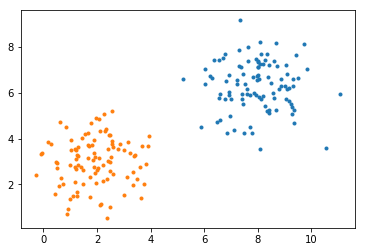

In [95]:
# generate D1 and D2 , also plot them

D1_input, D1_target = generateDataSet(n, mx1, vx1, my1, vy1, 0)
D2_input, D2_target = generateDataSet(n, mx2, vx2, my2, vy2, 1)


train_input = np.append(D1_input, D2_input, axis=0)
train_target = np.append(D1_target, D2_target, axis=0)

plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2")
plt.show()

In [810]:
# save generated data set
np.savetxt('train_dataset.csv', np.dstack((train_input[:,0], train_input[:,1], train_target))[0], delimiter=',')

In [771]:
# initial parameter
X = np.array([convertFeature(xv) for xv in train_input])
w = np.array([0 for _ in range(3)], dtype='float64')

convergence = 10**-3
max_convergence = 10
max_iter = 1000
enable_Hession = True

current_convergence = 0
current_iter = 0
while(True):
    gradient = np.matmul(X.T , train_target -  1/(1 + np.exp(-1 * np.matmul(X, w))) )
    #print('gradient  \t' + str(gradient))
    D = 1-(1/(1+np.exp(-1*np.matmul(X, w))))
    D = np.matmul(generateHessionEye(1/(1+np.exp(-1*np.matmul(X, w)))), D)
    D = generateHessionEye(D)
    Hession = np.matmul(np.matmul(X.T, D), X)
    #print('hession   \t' + str(Hession))
    #print('orig  of w\t' + str(w))
    if (np.linalg.det(Hession)!=0 and enable_Hession):
        #print('[{:3d}] use Hession'.format(current_iter))
        delta = np.matmul(np.linalg.inv(Hession), gradient)
    else:
        #print('[{:3d}] use gradient'.format(current_iter))
        delta = gradient
    w += delta
    
    if (np.alltrue(abs(delta) < convergence)):
        current_convergence += 1
        if (current_convergence == max_convergence):
            break;
    else:
        current_convergence = 0
    
    current_iter += 1
    if (current_iter == max_iter):
        break
    #print('after of w\t' + str(w))
    
print('use {} count to get convergence'.format(current_iter))

use 77 count to get convergence


[298.80783097 -49.6173371  -16.03425753]


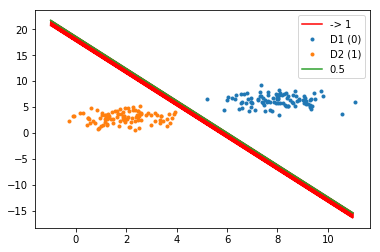

In [772]:
x = np.linspace(-1,11, 1000)
y = [-1*((i*w[1] + w[0])/w[2]) for i in x]
y_1 = [y[i]+(1/w[2])*abs(w[2]) if i%2==0 else y[i] for i in range(len(y))]
#y_1_dis = crossAddList(y_1, y)
#x_dis = crossAddList(x, x)
print(w)
plt.plot(x,y_1, 'r', label='-> 1')
plt.plot(D1_input[:, 0], D1_input[:, 1], '.', label="D1 (0)")
plt.plot(D2_input[:, 0], D2_input[:, 1], '.', label="D2 (1)")
plt.plot(x,y, label="0.5")

plt.legend()
plt.show()

In [834]:
# print confusion matrix
all_predict = np.round(1/(1+np.exp(-1*np.matmul(X, w))), decimals=20)
D0_result = (all_predict[:n] == train_target[:n])
D1_result = (all_predict[n:] == train_target[n:])

# TP mean true D0 and predict D0
TP = np.count_nonzero(D0_result)
# FN mean true D0 but predict D1
FN = D0_result.shape[0] - TP
# TN mean true D1 and predict D1
TN = np.count_nonzero(D1_result)
# FP mean true D1 but predict D0
FP = D1_result.shape[0] - TN

Markdown('Confusion Matrix <br>' + ShowMatrixByLatex([[TP,FP],[FN,TN]]))

Confusion Matrix <br>$\begin{bmatrix} 100.000 & 0.000 \\0.000 & 100.000 \end{bmatrix}$

### EM algorithm

- INPUT
    - MNIST training data
    - MNIST training label
- FUNCTION
    - Binning the gray value into 2 bins, each pixel follows a different Binomial distribution independent to others
    - Use EM algorithm to cluster each image into 10 groups
        - determine convergence
- OUTPUT
    - For each group (digit)
        - confusion matrix
        - sensitivity
        - specificity
        
#### E step

#### M step